In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploring

In [2]:
df=pd.read_csv("/content/kidney_disease (2).csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [6]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# Printing unique values in data
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

The data has lots of typos

# Preprocessing

## Fixing typos

In [11]:
# replace some incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
# converting necessary columns to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [13]:
df['class'] = df['class'].map({'not ckd': 0, 'ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [14]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,1
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,1
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Fixing Missing Values

In [17]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
class                       0
dtype: int64

In [19]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [20]:
# filling null values, we will use two methods, random sampling for higher null values and mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [21]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [22]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

## Feature Encoding

In [23]:
# Printing unique values in cat_cols
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

We used a label encoder to transform the categorical data to numerical data

In [25]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,107.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.1,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
5,60.0,90.0,1.015,3.0,0.0,0,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,1
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,36.0,8100.0,4.9,0,0,0,0,0,0,1
7,24.0,70.0,1.015,2.0,4.0,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,0,1,0,1
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,0,0,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# Visualizing the Data

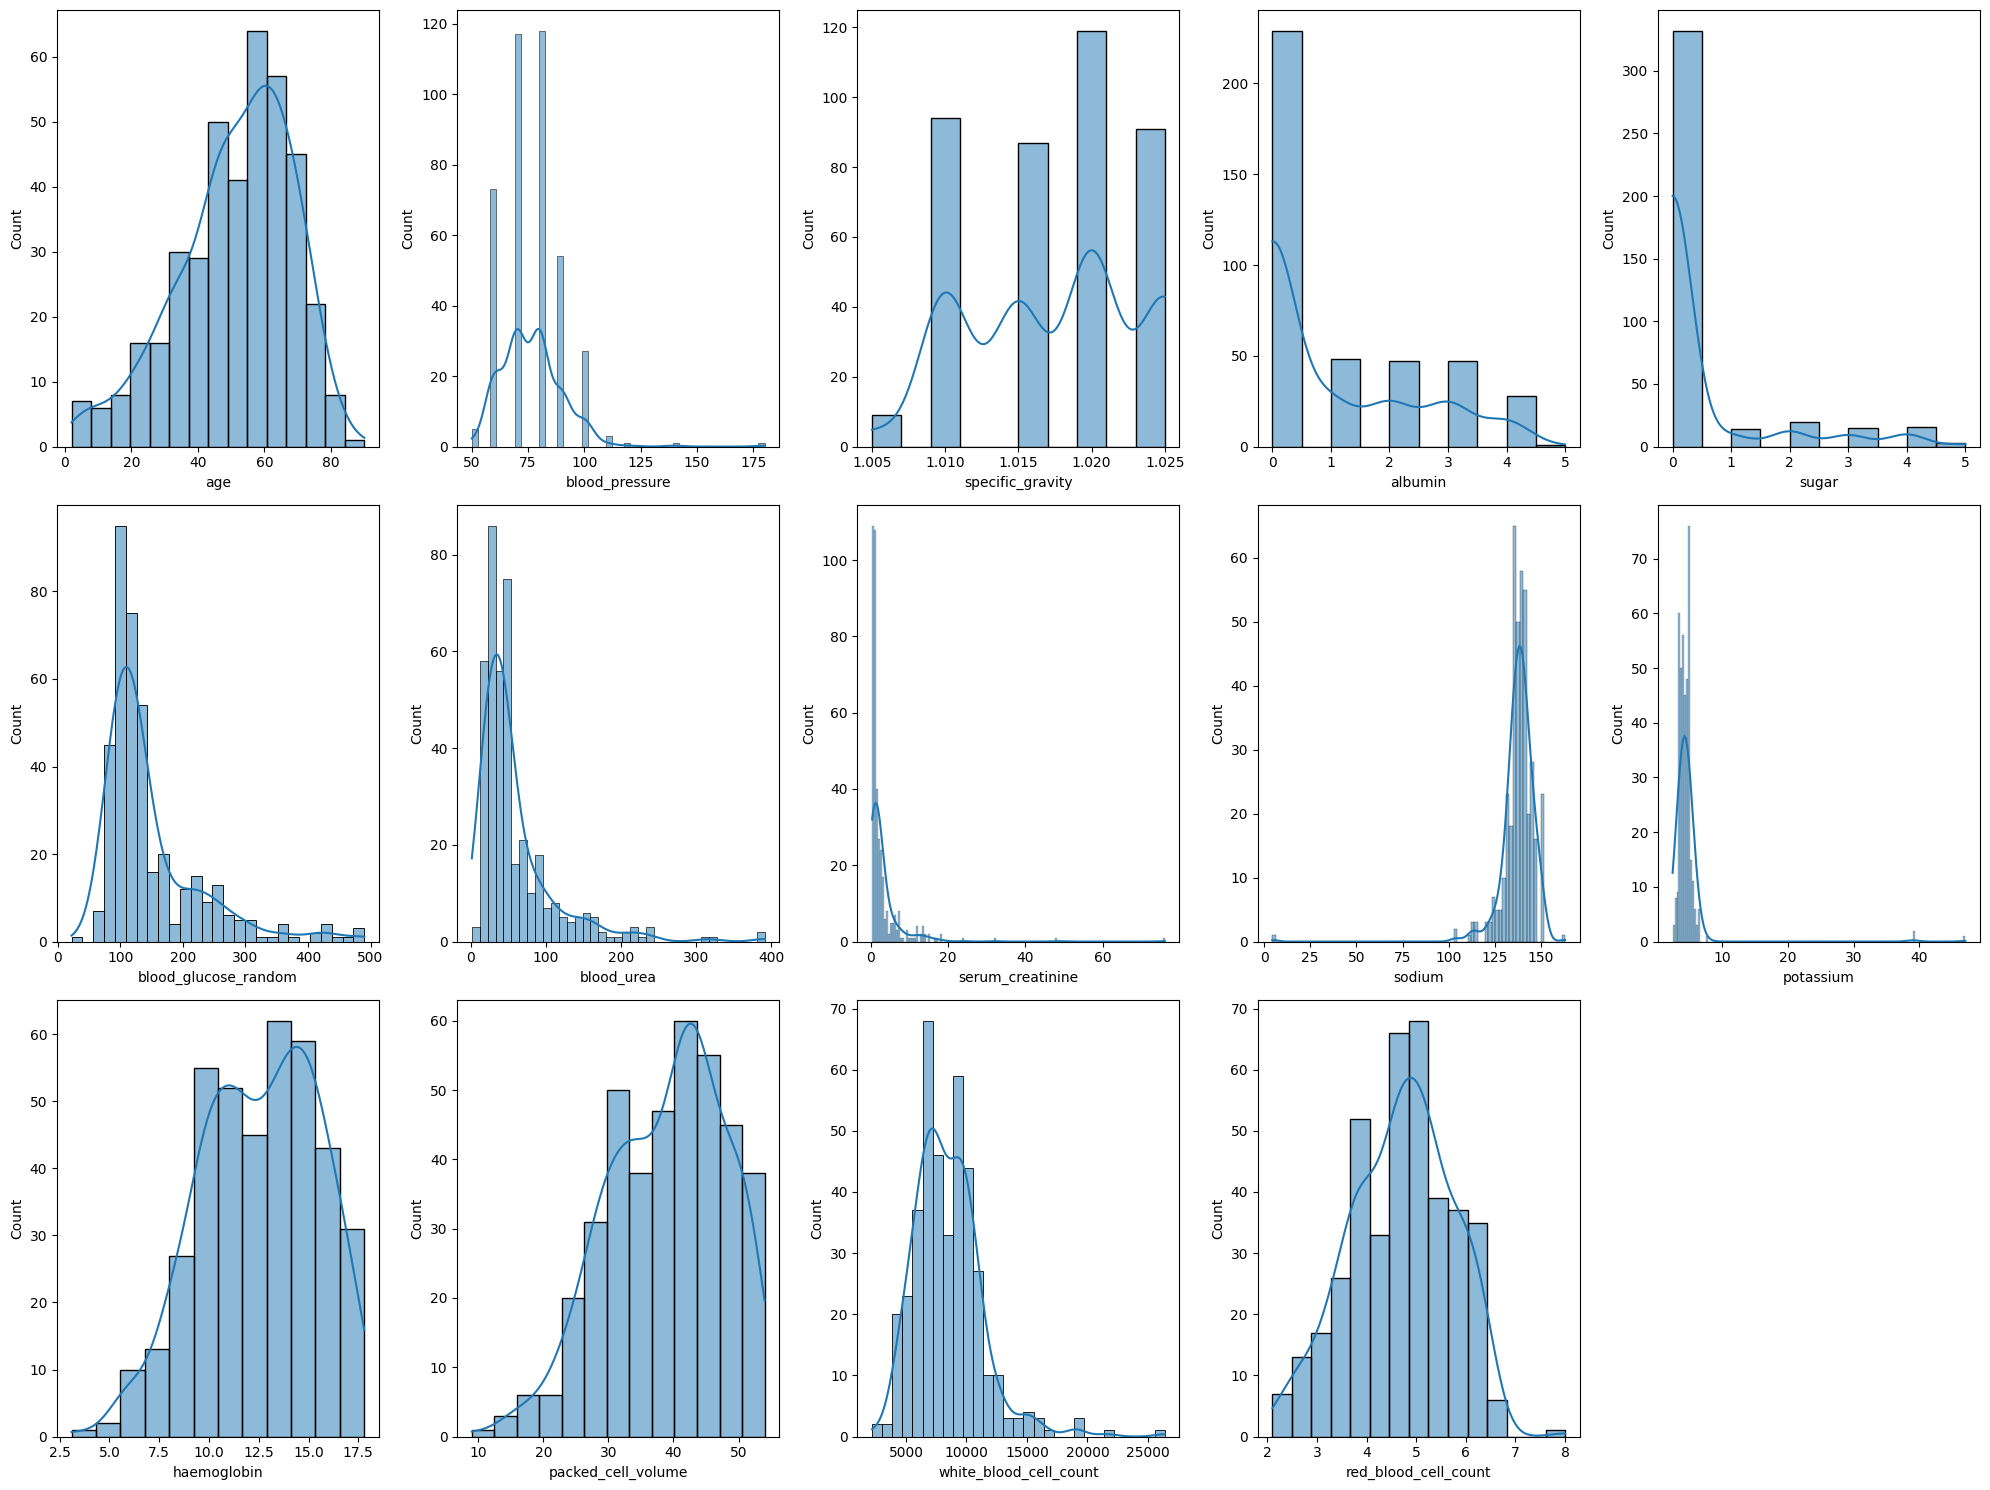

In [27]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

We can see some skewness in the data

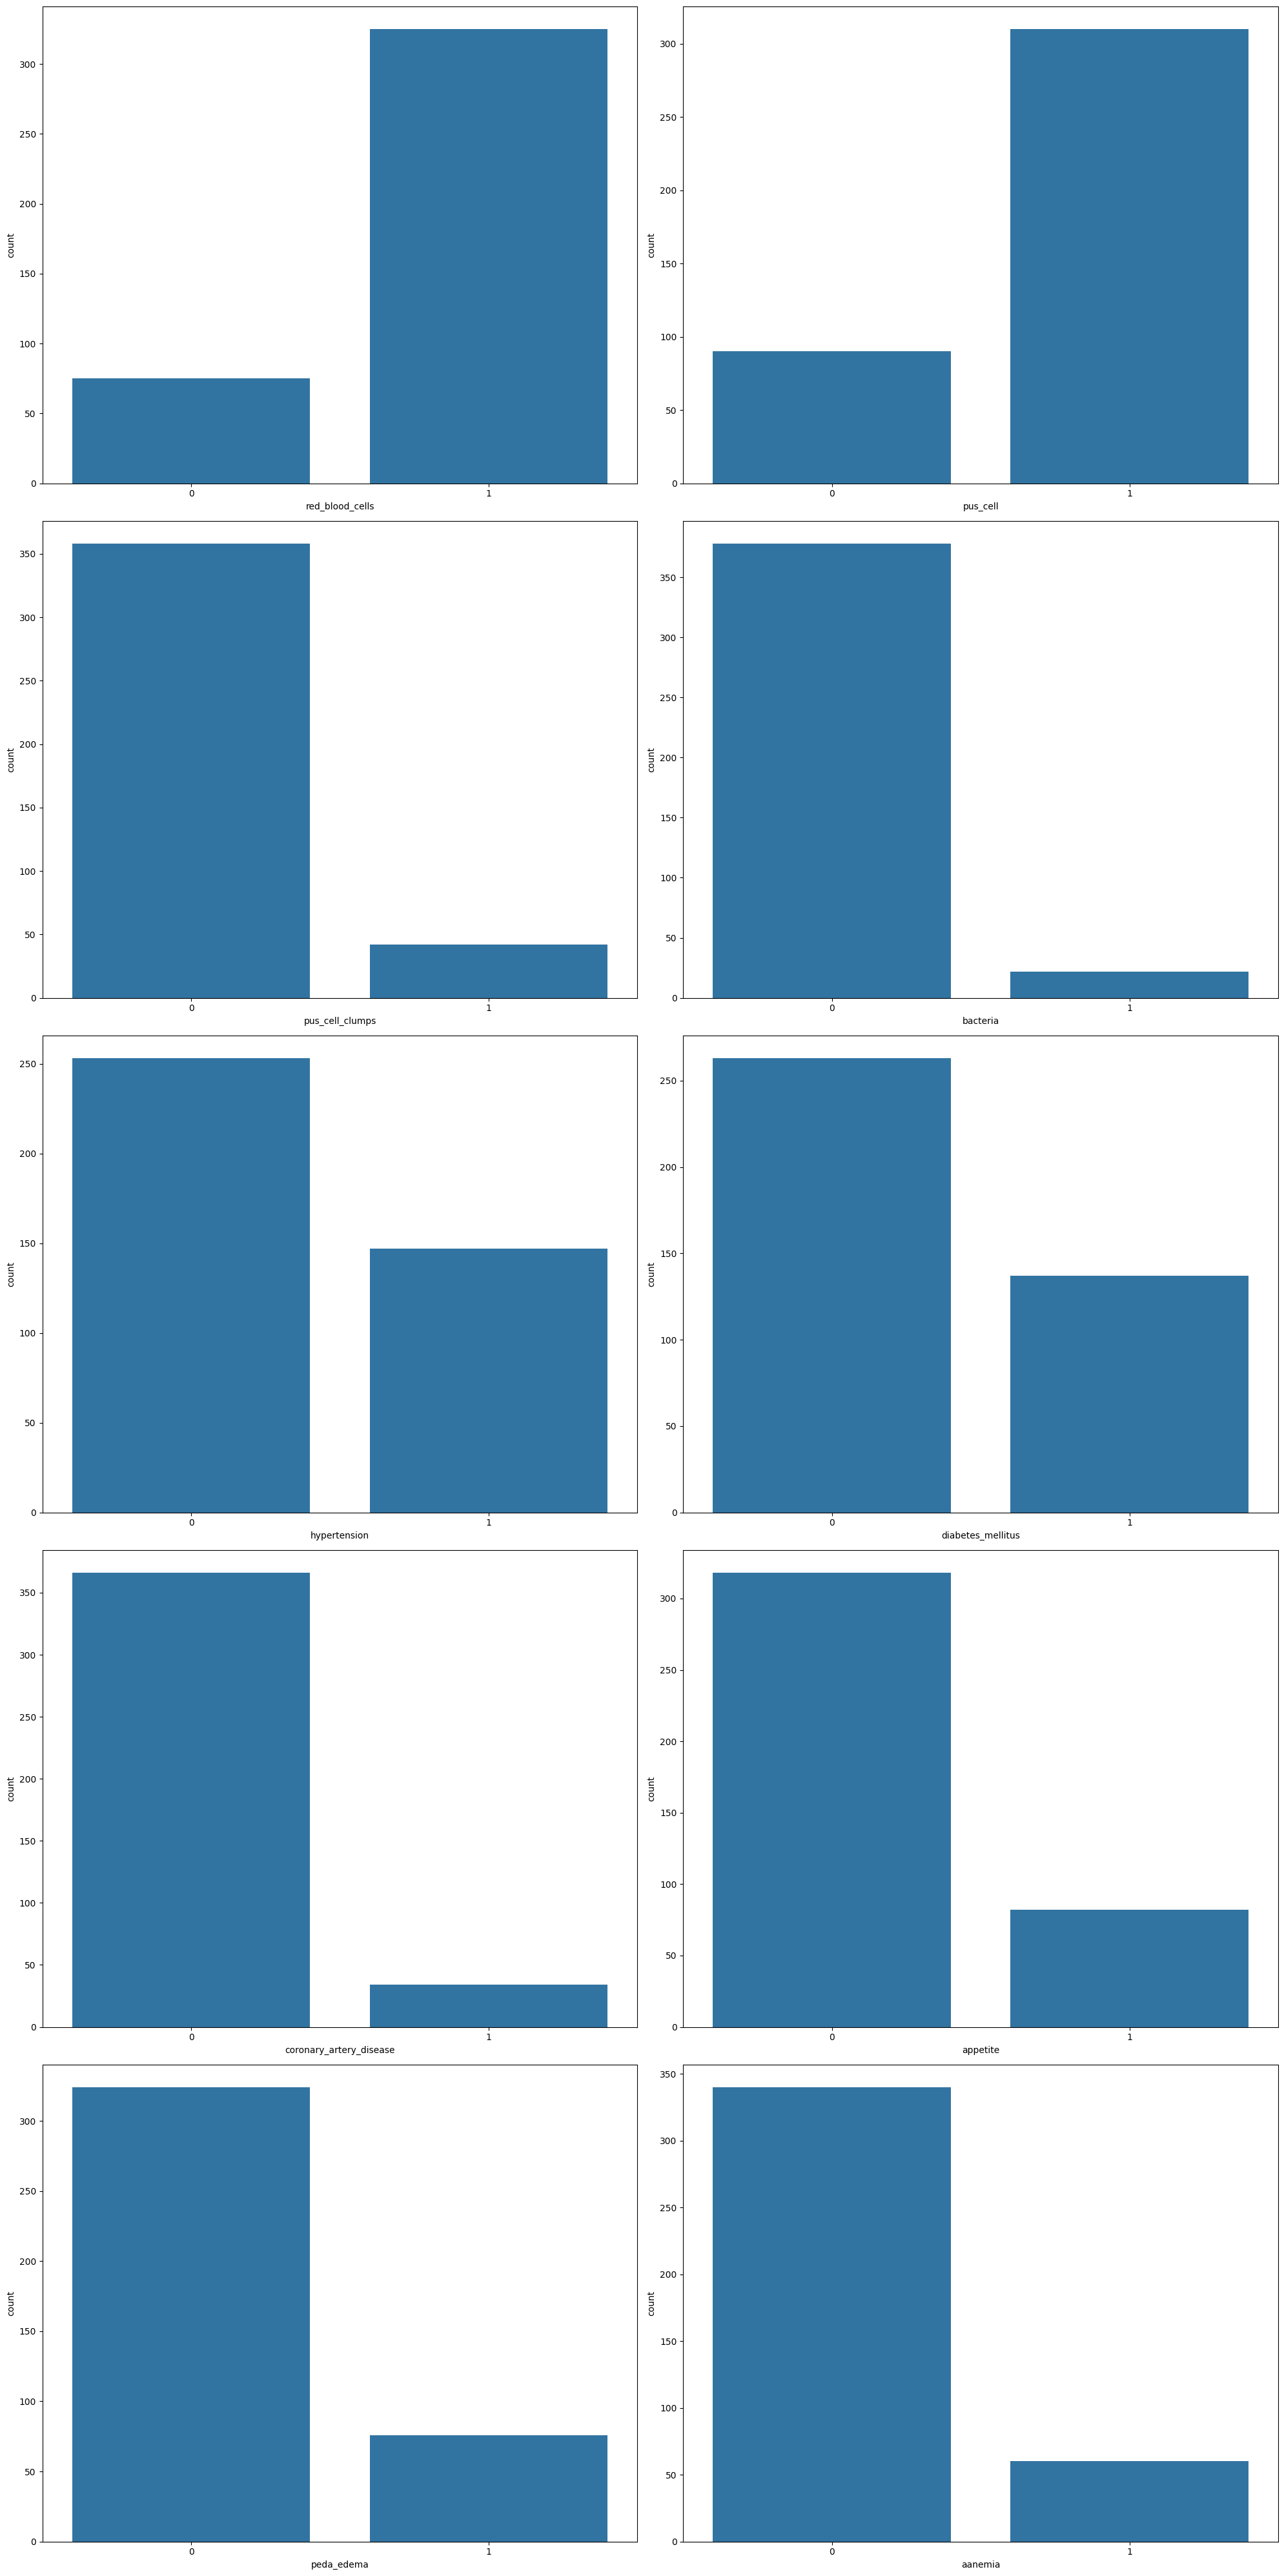

In [28]:
# Checking categorical columns
plt.figure(figsize=(20, 40))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(data=df, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

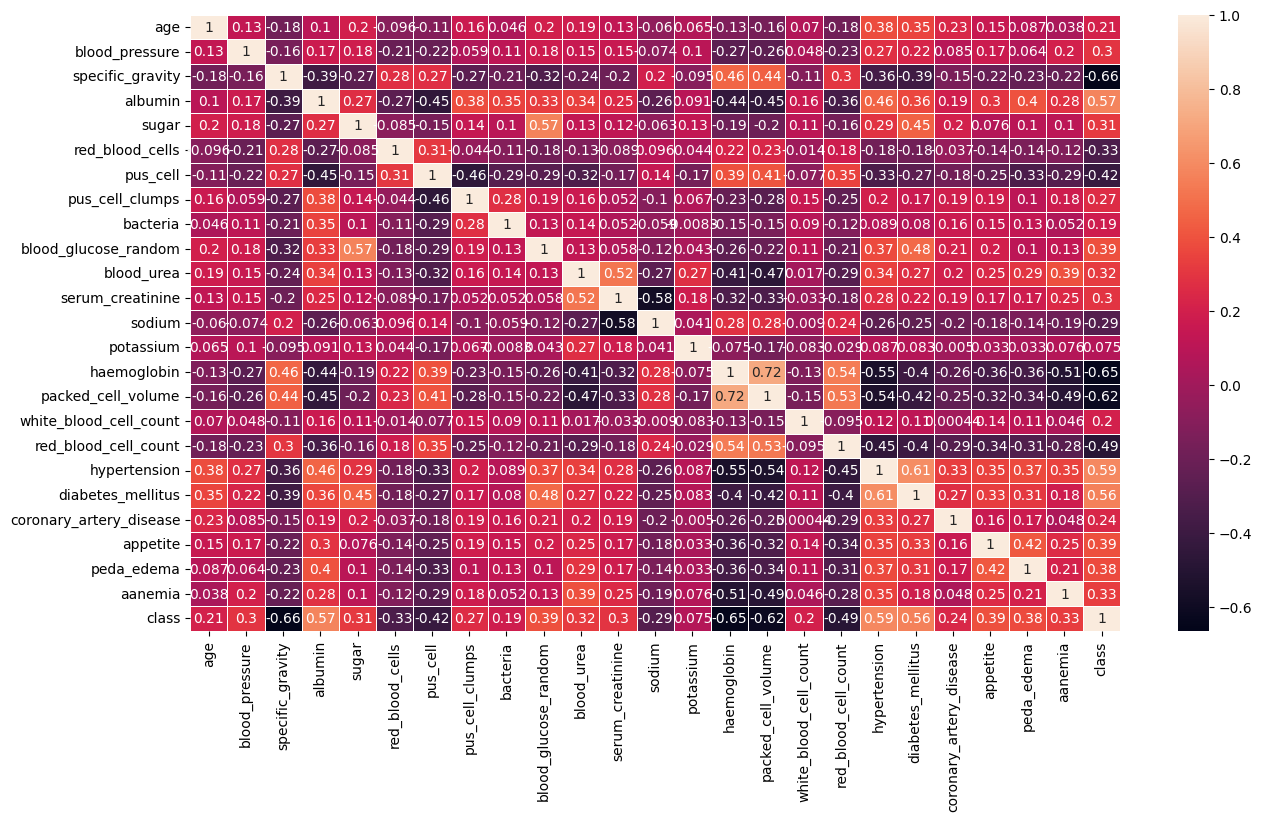

In [29]:
# heatmap of the data
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)
plt.show()

In [30]:
# Calculate the correlation list
target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
print(target_corr)

specific_gravity           0.663989
haemoglobin                0.647801
packed_cell_volume         0.617993
hypertension               0.590438
albumin                    0.572598
diabetes_mellitus          0.559060
red_blood_cell_count       0.488100
pus_cell                   0.417365
appetite                   0.393341
blood_glucose_random       0.392799
peda_edema                 0.375154
red_blood_cells            0.332413
aanemia                    0.325396
blood_urea                 0.321220
sugar                      0.314404
blood_pressure             0.295556
serum_creatinine           0.295190
sodium                     0.293950
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.211520
white_blood_cell_count     0.201820
bacteria                   0.186871
potassium                  0.074884
Name: class, dtype: float64


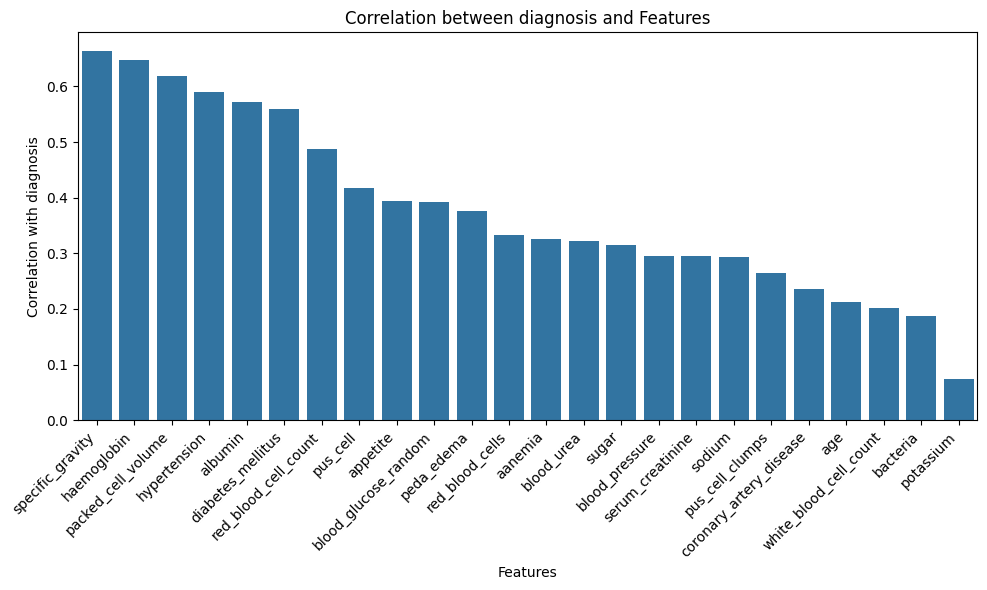

In [31]:
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

We can see here which features correlate with the classification the most.

# Modeling

## Supervised Learning

### Defining Scoring Function

In [32]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Defining Scoring Function
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        return accuracy_score(y_test, pred) * 100, roc_auc_score(y_test, y_test_prob) * 100

### Splitting Data and Scaling it

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop("class", axis=1)
y = df["class"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=1)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (400, 24)
'y' shape: (400,)


In [34]:
pip install imbalanced-learn


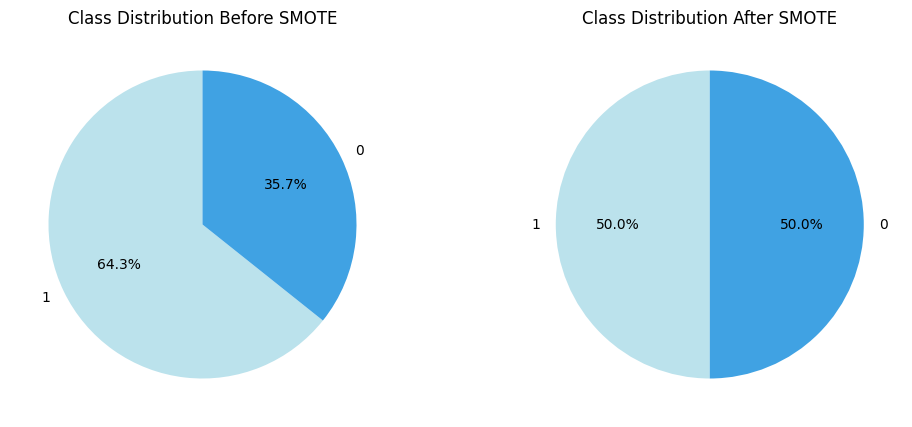

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming y_train is your target variable
class_counts_before = y_train.value_counts()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
class_counts_after = y_resampled.value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90, colors=['#BBE2EC', '#40A2E3'])
axes[0].set_title('Class Distribution Before SMOTE')

# After SMOTE
axes[1].pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90, colors=['#BBE2EC', '#40A2E3'])
axes[1].set_title('Class Distribution After SMOTE')

plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming you have the training data (X_train, y_train)

# Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline for resampled data
X_resampled_train_scaled = scaling_pipeline.fit_transform(X_resampled_train)
X_resampled_test_scaled = scaling_pipeline.transform(X_resampled_test)

# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Extra Trees Classifier
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

et_grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid=et_param_grid, cv=5)
et_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# LightGBM Classifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1]
}

lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, cv=5)
lgbm_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],  # L2 regularization
}

lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Function to calculate and plot evaluation metrics
def plot_evaluation_metrics(model_name, grid_search, X_test, y_test):
    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

    df_metrics = pd.DataFrame(metrics, index=[0])

    return df_metrics

# Calculate evaluation metrics for each model on the resampled test data
df_rf_metrics = plot_evaluation_metrics("Random Forest", rf_grid_search, X_resampled_test_scaled, y_resampled_test)
df_et_metrics = plot_evaluation_metrics("Extra Trees", et_grid_search, X_resampled_test_scaled, y_resampled_test)
df_lgbm_metrics = plot_evaluation_metrics("LightGBM", lgbm_grid_search, X_resampled_test_scaled, y_resampled_test)
df_dt_metrics = plot_evaluation_metrics("Decision Tree", dt_grid_search, X_resampled_test_scaled, y_resampled_test)
df_lr_metrics = plot_evaluation_metrics("Logistic Regression", lr_grid_search, X_resampled_test_scaled, y_resampled_test)

# Create a DataFrame to display test and training accuracy for each model
df_accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees', 'LightGBM', 'Decision Tree', 'Logistic Regression'],
    'Training Accuracy': [rf_grid_search.best_score_, et_grid_search.best_score_, lgbm_grid_search.best_score_, dt_grid_search.best_score_, lr_grid_search.best_score_],
    'Test Accuracy': [df_rf_metrics['Accuracy'][0], df_et_metrics['Accuracy'][0], df_lgbm_metrics['Accuracy'][0], df_dt_metrics['Accuracy'][0], df_lr_metrics['Accuracy'][0]]
})

# Display the DataFrame
df_accuracy


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

,Model,Training Accuracy,Test Accuracy
0,Random Forest,0.980157,0.990741
1,Extra Trees,0.996078,0.990741
2,LightGBM,0.988157,0.990741
3,Decision Tree,0.956235,0.962963
4,Logistic Regression,0.988157,0.990741


<ipython-input-37-cc99c58d7a11>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, ci=None, palette=colors)
<ipython-input-37-cc99c58d7a11>:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_metrics, ci=None, palette=colors)


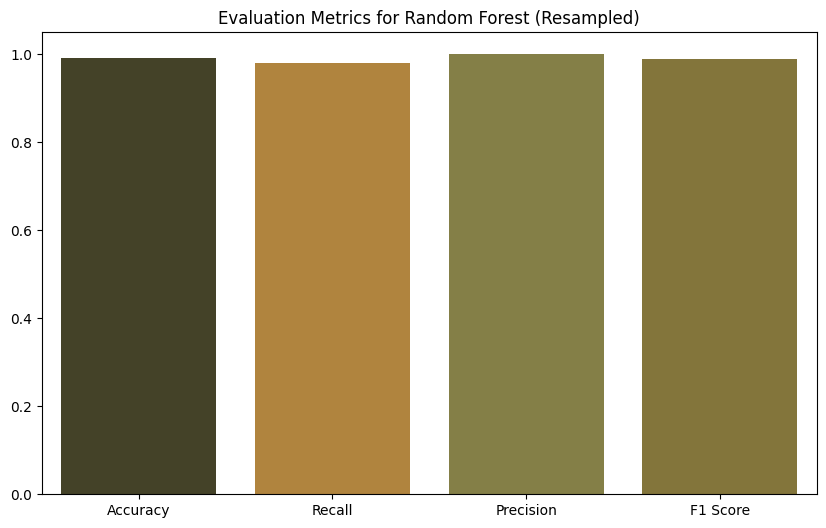

<ipython-input-37-cc99c58d7a11>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, ci=None, palette=colors)
<ipython-input-37-cc99c58d7a11>:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_metrics, ci=None, palette=colors)


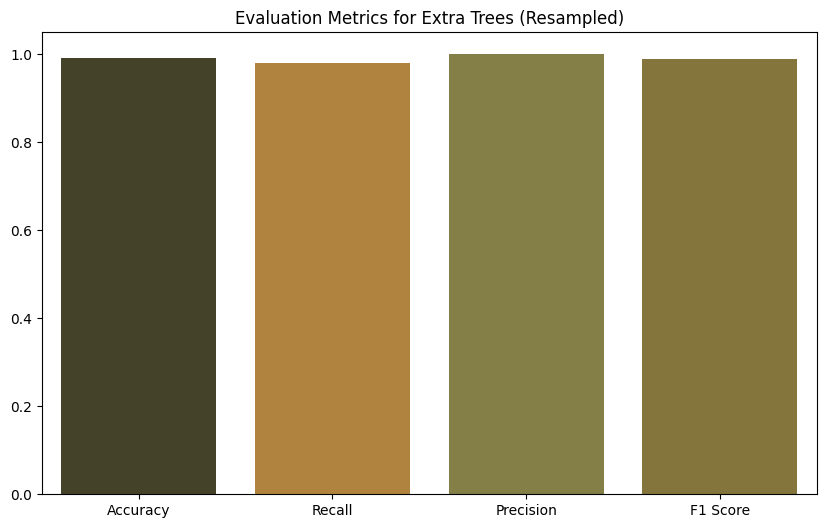

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


<ipython-input-37-cc99c58d7a11>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, ci=None, palette=colors)
<ipython-input-37-cc99c58d7a11>:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_metrics, ci=None, palette=colors)


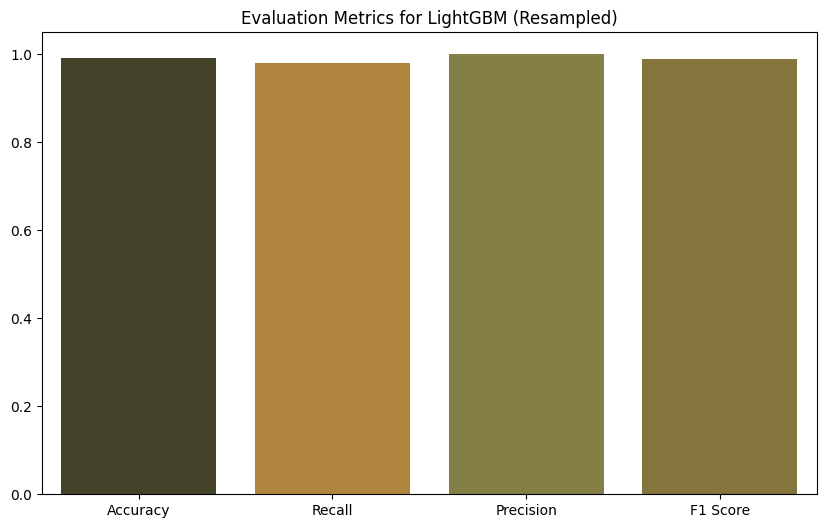

<ipython-input-37-cc99c58d7a11>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, ci=None, palette=colors)
<ipython-input-37-cc99c58d7a11>:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_metrics, ci=None, palette=colors)


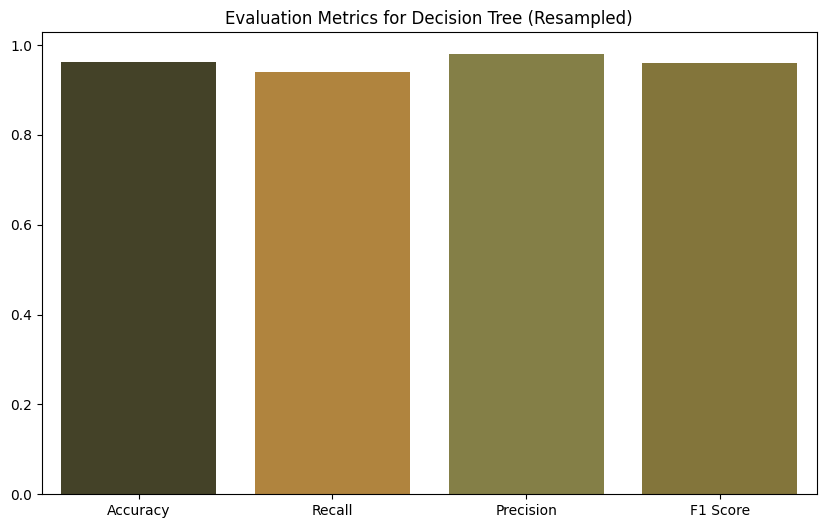

<ipython-input-37-cc99c58d7a11>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, ci=None, palette=colors)
<ipython-input-37-cc99c58d7a11>:30: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_metrics, ci=None, palette=colors)


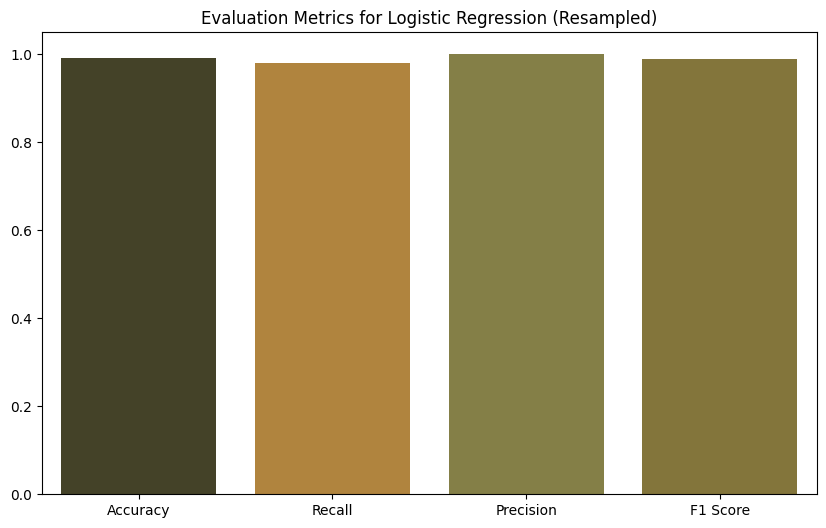

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Function to calculate and plot evaluation metrics for resampled data
def plot_evaluation_metrics_resampled(model_name, grid_search, X_test, y_test):
    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

    df_metrics = pd.DataFrame(metrics, index=[0])

    # Specify the color palette using the provided colors
    colors = ['#494623', '#C3892B', '#8E883D', '#8F7C2F', '#E8E7D8']

    # Plot histograms with specified palette
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_metrics, ci=None, palette=colors)
    plt.title(f"Evaluation Metrics for {model_name} (Resampled)")
    plt.show()

# Plot evaluation metrics for each model on the resampled test data
plot_evaluation_metrics_resampled("Random Forest", rf_grid_search, X_resampled_test_scaled, y_resampled_test)
plot_evaluation_metrics_resampled("Extra Trees", et_grid_search, X_resampled_test_scaled, y_resampled_test)
plot_evaluation_metrics_resampled("LightGBM", lgbm_grid_search, X_resampled_test_scaled, y_resampled_test)
plot_evaluation_metrics_resampled("Decision Tree", dt_grid_search, X_resampled_test_scaled, y_resampled_test)
plot_evaluation_metrics_resampled("Logistic Regression", lr_grid_search, X_resampled_test_scaled, y_resampled_test)


NameError: name 'df_metrics' is not defined

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Assuming you have the original data (X, y)
# Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline for resampled data
X_resampled_train_scaled = scaling_pipeline.fit_transform(X_resampled_train)
X_resampled_test_scaled = scaling_pipeline.transform(X_resampled_test)

# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Added max_features for feature selection
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Extra Trees Classifier
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Added max_features for feature selection
}

et_grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid=et_param_grid, cv=5)
et_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# LightGBM Classifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_child_samples': [5, 10, 20]  # Added min_child_samples for overfitting control
}

lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, cv=5)
lgbm_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']  # Added max_features for overfitting control
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],  # L2 regularization
}

lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_resampled_train_scaled, y_resampled_train)

# Display results for each model
def display_results(model_name, grid_search, X_features):
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Best Cross-Validation Score: {grid_search.best_score_}")

    if 'feature_importances_' in dir(grid_search.best_estimator_):
        print(f"{model_name} - Number of Features: {len(grid_search.best_estimator_.feature_importances_)}")

        # Get feature importances if available
        feature_importances = grid_search.best_estimator_.feature_importances_
        print(f"{model_name} - Feature Importances: {feature_importances}")
    elif 'coef_' in dir(grid_search.best_estimator_):
        print(f"{model_name} - Number of Features: {len(grid_search.best_estimator_.coef_[0])}")

        # Get feature coefficients for Logistic Regression
        feature_coefficients = grid_search.best_estimator_.coef_[0]
        print(f"{model_name} - Feature Coefficients: {feature_coefficients}")
    else:
        print(f"{model_name} - Feature Importances: N/A")

    print("\n")

# Display results for each model using resampled data
display_results("Random Forest", rf_grid_search, X_resampled_train_scaled)
display_results("Extra Trees", et_grid_search, X_resampled_train_scaled)
display_results("LightGBM", lgbm_grid_search, X_resampled_train_scaled)
display_results("Decision Tree", dt_grid_search, X_resampled_train_scaled)
display_results("Logistic Regression", lr_grid_search, X_resampled_train_scaled)


KeyboardInterrupt: 

In [ ]:
import shap

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the training data (X, y)
# Assuming you have resampled data (X_resampled, y_resampled)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline for resampled data
X_resampled_scaled = scaling_pipeline.fit_transform(X_resampled)

# Dictionary to store results
results_dict = {'Model': [], 'Parameters': [], 'Cross-Validation Score': []}

# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_resampled_scaled, y_resampled)

# List of models
models = [rf_grid_search]

# Loop through models to collect results
for model, model_name in zip(models, ["Random Forest"]):
    best_params = model.best_params_
    best_score = model.best_score_

    results_dict['Model'].append(model_name)
    results_dict['Parameters'].append(best_params)
    results_dict['Cross-Validation Score'].append(best_score)

    # Generate confusion matrix
    y_pred = model.predict(X_resampled_scaled)
    cm = confusion_matrix(y_resampled, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the training data (X, y)
# Assuming you have resampled data (X_resampled, y_resampled)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline for resampled data
X_resampled_scaled = scaling_pipeline.fit_transform(X_resampled)

# Dictionary to store results
results_dict = {'Model': [], 'Parameters': [], 'Cross-Validation Score': []}

# List of models
models = [
    (RandomForestClassifier(random_state=42), 'Random Forest', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    (ExtraTreesClassifier(random_state=42), 'Extra Trees', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    (LGBMClassifier(random_state=42), 'LightGBM', {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1],
        'min_child_samples': [5, 10, 20]
    }),
    (DecisionTreeClassifier(random_state=42), 'Decision Tree', {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    (LogisticRegression(random_state=42), 'Logistic Regression', {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    })
]

# Loop through models to collect results
for model, model_name, param_grid in models:
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_resampled_scaled, y_resampled)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results_dict['Model'].append(model_name)
    results_dict['Parameters'].append(best_params)
    results_dict['Cross-Validation Score'].append(best_score)

    # Generate confusion matrix
    y_pred = grid_search.predict(X_resampled_scaled)
    cm = confusion_matrix(y_resampled, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
results_df


In [ ]:
results_df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Assuming you have the training data (X, y)
# Assuming you have resampled data (X_resampled, y_resampled)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline for resampled data
X_resampled_scaled = scaling_pipeline.fit_transform(X_resampled)

# Dictionary to store results
results_dict = {'Model': [], 'Parameters': [], 'Cross-Validation Score': []}

# List of models
models = [
    (RandomForestClassifier(random_state=42), 'Random Forest', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    (ExtraTreesClassifier(random_state=42), 'Extra Trees', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    (LGBMClassifier(random_state=42), 'LightGBM', {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1],
        'min_child_samples': [5, 10, 20]
    }),
    (DecisionTreeClassifier(random_state=42), 'Decision Tree', {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    (LogisticRegression(random_state=42), 'Logistic Regression', {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    })
]

# Loop through models to collect results
for model, model_name, param_grid in models:
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_resampled_scaled, y_resampled)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results_dict['Model'].append(model_name)
    results_dict['Parameters'].append(best_params)
    results_dict['Cross-Validation Score'].append(best_score)

# Create a DataFrame from the results
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print("Results DataFrame:")
print(results_df)

# Calculate mean of cross-validation scores
mean_cross_val_scores = results_df.groupby('Model')['Cross-Validation Score'].mean().reset_index()

# Display mean cross-validation scores DataFrame
print("\nMean Cross-Validation Scores:")
print(mean_cross_val_scores)


In [ ]:
results_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
df_accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees', 'LightGBM', 'Decision Tree', 'Logistic Regression','ANN'],
    'Training Accuracy': [0.992078, 0.996078, 0.996000, 0.964235, 0.992000,0.99300],
    'Test Accuracy': [0.989741, 0.990741, 0.981481, 0.962963, 0.990741,0.973333]
})

# Specify colors
colors = ['#C3892B', '#8F7C2F']

# Plotting the histogram
plt.figure(figsize=(12, 8))
sns.barplot(data=df_accuracy.melt(id_vars='Model'), x='Model', y='value', hue='variable', palette=colors)
plt.title('Training and Test Accuracy for CKD Prediction Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.legend(title=None, loc='upper right')
plt.show()

# Display the DataFrame
print(df_accuracy)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the resampled training data (X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Apply scaling using the pipeline
X_train_scaled = scaling_pipeline.fit_transform(X_train_resampled)
X_test_scaled = scaling_pipeline.transform(X_test_resampled)

# Deep Neural Network (MLP) Classifier
mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (32,), (128, 64), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

start_time = time.time()

mlp_grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=100), param_grid=mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train_scaled, y_train_resampled)

end_time = time.time()

# Display results for the neural network
display_results("Deep Neural Network", mlp_grid_search, X_train_scaled)

# Get the best estimator from the grid search
best_model = mlp_grid_search.best_estimator_

# Evaluate the accuracy on the test set
test_accuracy = best_model.score(X_test_scaled, y_test_resampled)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Print training and test scores
print("Training Score:", best_model.score(X_train_scaled, y_train_resampled))
print("Test Score:", test_accuracy)

# Plotting the histogram
train_accuracy = best_model.score(X_train_scaled, y_train_resampled)
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training', 'Test'], y=[train_accuracy, test_accuracy], palette='viridis')
plt.title('Training and Test Accuracy for Deep Neural Network')
plt.ylim(0, 1.1)
plt.show()


In [ ]:
import shap

In [ ]:
# Define a list of tuples containing the best models and their corresponding names
best_models = [
    (rf_grid_search.best_estimator_, "Random Forest"),
    (et_grid_search.best_estimator_, "Extra Trees"),
    (lgbm_grid_search.best_estimator_, "LightGBM"),
    (dt_grid_search.best_estimator_, "Decision Tree"),
    (lr_grid_search.best_estimator_, "Logistic Regression")
]

# Loop through the best models to print scores for both training and test sets
for model, model_name in best_models:
    # Predict probabilities for both training and test sets
    y_train_prob = model.predict_proba(X_resampled_train_scaled)[:, 1]
    y_test_prob = model.predict_proba(X_resampled_test_scaled)[:, 1]

    print(model_name)
    # Print scores for training set
    train_accuracy, train_roc_auc, train_classification_report = print_score(model, X_resampled_train_scaled,
                                                                             y_resampled_train,
                                                                             X_resampled_test_scaled,
                                                                             y_resampled_test,
                                                                             y_train_prob, y_test_prob)
    print(model_name)
    # Print scores for test set
    test_accuracy, test_roc_auc, test_classification_report = print_score(model, X_resampled_train_scaled,
                                                                           y_resampled_train,
                                                                           X_resampled_test_scaled,
                                                                           y_resampled_test,
                                                                           y_train_prob, y_test_prob, train=False)


<ipython-input-41-132f051a66c4>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-41-132f051a66c4>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 129, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511905 -> initscore=0.047628
[LightGBM] [Info] Start training from score 0.047628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

<ipython-input-41-132f051a66c4>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-41-132f051a66c4>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-41-132f051a66c4>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
/usr/local/lib/python3.10/dist-

<Figure size 1200x800 with 0 Axes>

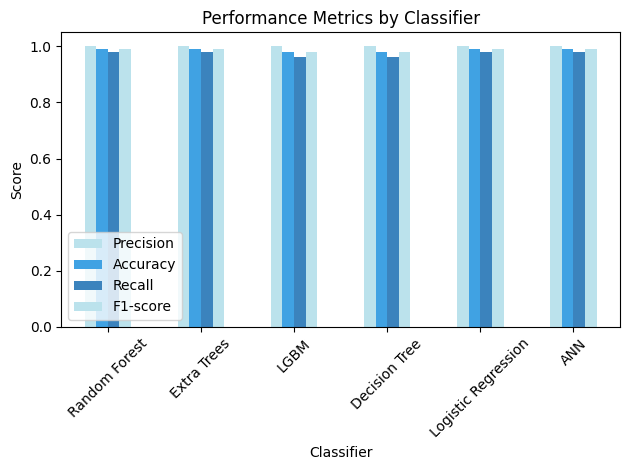

Confusion matrix for Random Forest:
[[57  0]
 [ 1 50]]
Confusion matrix for Extra Trees:
[[57  0]
 [ 1 50]]
Confusion matrix for LGBM:
[[57  0]
 [ 2 49]]
Confusion matrix for Decision Tree:
[[57  0]
 [ 2 49]]
Confusion matrix for Logistic Regression:
[[57  0]
 [ 1 50]]
Confusion matrix for ANN:
[[57  0]
 [ 1 50]]


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# 1. Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 3. Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# 4. Apply scaling using the pipeline for resampled data
X_resampled_train_scaled = scaling_pipeline.fit_transform(X_resampled_train)
X_resampled_test_scaled = scaling_pipeline.transform(X_resampled_test)

# 5. Train each classifier with their respective best parameters
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "LGBM": LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, min_child_samples=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=10, penalty='l2'),
    "ANN": MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001, learning_rate_init=0.01, solver='sgd')
}

# Initialize lists to store results
metrics_df = pd.DataFrame(columns=['Classifier', 'Precision', 'Accuracy', 'Recall', 'F1-score'])
confusion_matrices = {}

# 6. Evaluate performance and store results
for name, clf in classifiers.items():
    clf.fit(X_resampled_train_scaled, y_resampled_train)
    y_pred = clf.predict(X_resampled_test_scaled)
    precision = precision_score(y_resampled_test, y_pred)
    accuracy = accuracy_score(y_resampled_test, y_pred)
    recall = recall_score(y_resampled_test, y_pred)
    f1 = f1_score(y_resampled_test, y_pred)
    metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
    confusion_matrices[name] = confusion_matrix(y_resampled_test, y_pred)

# 7. Plot precision, accuracy, recall, and F1-score
plt.figure(figsize=(12, 8))
sns.set_palette(['#BBE2EC', '#40A2E3', '#3B83BD'])
ax = metrics_df.set_index('Classifier')[['Precision', 'Accuracy', 'Recall', 'F1-score']].plot(kind='bar', rot=45)
ax.set_title('Performance Metrics by Classifier')
ax.set_ylabel('Score')
ax.set_xlabel('Classifier')
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

# 8. Store results in DataFrame
metrics_df.to_csv('classifier_metrics.csv', index=False)

# 9. Store confusion matrices in DataFrame
confusion_matrices_flat = {}
for name, cm in confusion_matrices.items():
    tn, fp, fn, tp = cm.ravel()
    confusion_matrices_flat[name] = {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp}

confusion_matrices_df = pd.DataFrame.from_dict(confusion_matrices_flat, orient='index')
confusion_matrices_df.to_csv('confusion_matrices.csv')

# 10. Print confusion matrices
for name, cm in confusion_matrices.items():
    print(f'Confusion matrix for {name}:')
    print(cm)


<ipython-input-43-6d426093f815>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-43-6d426093f815>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 129, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511905 -> initscore=0.047628
[LightGBM] [Info] Start training from score 0.047628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

<ipython-input-43-6d426093f815>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-43-6d426093f815>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-43-6d426093f815>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
<ipython-input-43-6d426093f815>

<Figure size 1200x800 with 0 Axes>

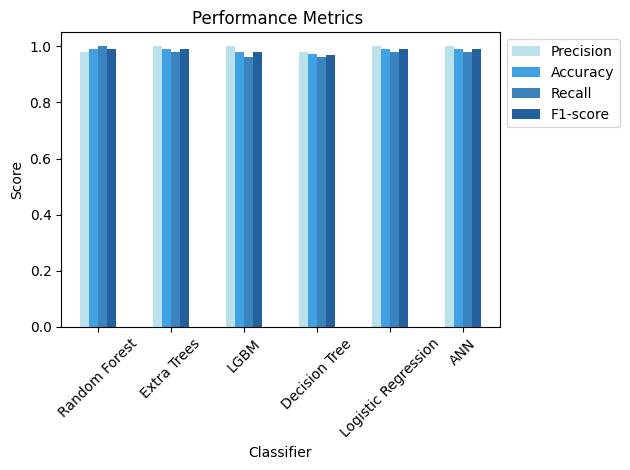

Confusion matrix for Random Forest:
[[56  1]
 [ 0 51]]
Confusion matrix for Extra Trees:
[[57  0]
 [ 1 50]]
Confusion matrix for LGBM:
[[57  0]
 [ 2 49]]
Confusion matrix for Decision Tree:
[[56  1]
 [ 2 49]]
Confusion matrix for Logistic Regression:
[[57  0]
 [ 1 50]]
Confusion matrix for ANN:
[[57  0]
 [ 1 50]]


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# 1. Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 3. Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# 4. Apply scaling using the pipeline for resampled data
X_resampled_train_scaled = scaling_pipeline.fit_transform(X_resampled_train)
X_resampled_test_scaled = scaling_pipeline.transform(X_resampled_test)

# 5. Train each classifier with their respective best parameters
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "LGBM": LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, min_child_samples=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=10, penalty='l2'),
    "ANN": MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001, learning_rate_init=0.01, solver='sgd')
}

# Initialize lists to store results
metrics_df = pd.DataFrame(columns=['Classifier', 'Precision', 'Accuracy', 'Recall', 'F1-score'])
confusion_matrices = {}

# 6. Evaluate performance and store results
for name, clf in classifiers.items():
    clf.fit(X_resampled_train_scaled, y_resampled_train)
    y_pred = clf.predict(X_resampled_test_scaled)
    precision = precision_score(y_resampled_test, y_pred)
    accuracy = accuracy_score(y_resampled_test, y_pred)
    recall = recall_score(y_resampled_test, y_pred)
    f1 = f1_score(y_resampled_test, y_pred)
    metrics_df = metrics_df.append({'Classifier': name, 'Precision': precision, 'Accuracy': accuracy, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
    confusion_matrices[name] = confusion_matrix(y_resampled_test, y_pred)

# 7. Plot precision, accuracy, recall, and F1-score
plt.figure(figsize=(12, 8))
colors = ['#BBE2EC', '#40A2E3', '#3B83BD', '#22619D']
sns.set_palette(colors)
ax = metrics_df.set_index('Classifier')[['Precision', 'Accuracy', 'Recall', 'F1-score']].plot(kind='bar', rot=45)
ax.set_title('Performance Metrics ')
ax.set_ylabel('Score')
ax.set_xlabel('Classifier')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# 8. Store results in DataFrame
metrics_df.to_csv('classifier_metrics.csv', index=False)

# 9. Store confusion matrices in DataFrame
confusion_matrices_flat = {}
for name, cm in confusion_matrices.items():
    tn, fp, fn, tp = cm.ravel()
    confusion_matrices_flat[name] = {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp}

confusion_matrices_df = pd.DataFrame.from_dict(confusion_matrices_flat, orient='index')
confusion_matrices_df.to_csv('confusion_matrices.csv')

# 10. Print confusion matrices
for name, cm in confusion_matrices.items():
    print(f'Confusion matrix for {name}:')
    print(cm)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 129, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511905 -> initscore=0.047628
[LightGBM] [Info] Start training from score 0.047628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

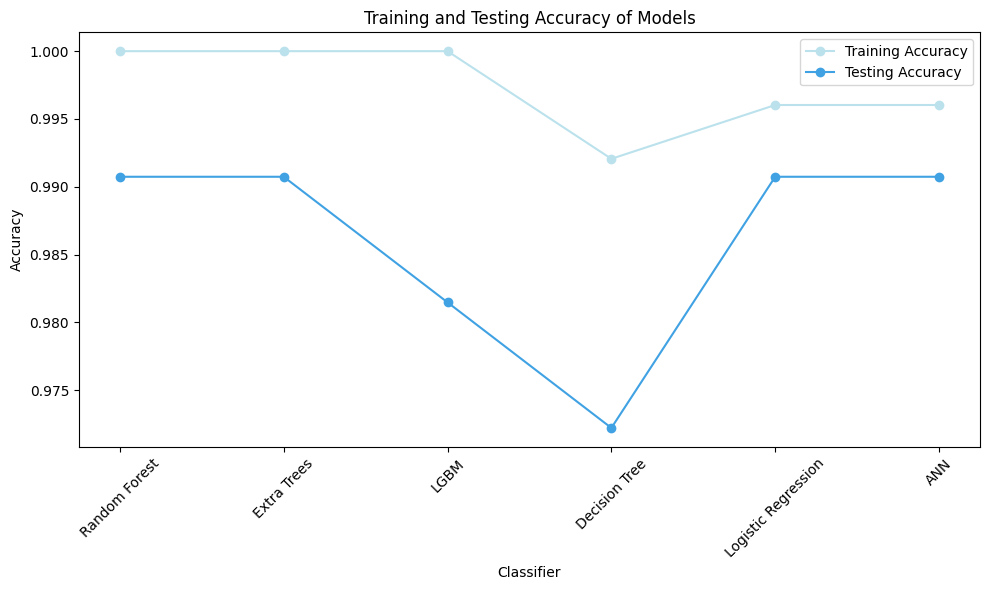

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# 1. Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 3. Create a pipeline for scaling
scaling_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# 4. Apply scaling using the pipeline for resampled data
X_resampled_train_scaled = scaling_pipeline.fit_transform(X_resampled_train)
X_resampled_test_scaled = scaling_pipeline.transform(X_resampled_test)

# 5. Train each classifier with their respective best parameters
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features='sqrt'),
    "LGBM": LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, min_child_samples=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=10, penalty='l2'),
    "ANN": MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001, learning_rate_init=0.01, solver='sgd')
}

# Initialize lists to store results
train_accuracy = []
test_accuracy = []

# 6. Evaluate performance and store results
for name, clf in classifiers.items():
    clf.fit(X_resampled_train_scaled, y_resampled_train)
    y_train_pred = clf.predict(X_resampled_train_scaled)
    y_test_pred = clf.predict(X_resampled_test_scaled)
    train_acc = accuracy_score(y_resampled_train, y_train_pred)
    test_acc = accuracy_score(y_resampled_test, y_test_pred)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# 7. Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(list(classifiers.keys()), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(list(classifiers.keys()), test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy by Classifier')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
